In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Cheking the null values

In [5]:
df.columns.isnull().sum()

0

In [6]:
cdf = df[["enginesize","horsepower","price"]]
cdf.head(10)

,enginesize,horsepower,price
0,130,111,13495.000
1,130,111,16500.000
2,152,154,16500.000
3,109,102,13950.000
4,136,115,17450.000
5,136,110,15250.000
6,136,110,17710.000
7,136,110,18920.000
8,131,140,23875.000
9,131,160,17859.167


In [7]:
cdf.shape

(205, 3)

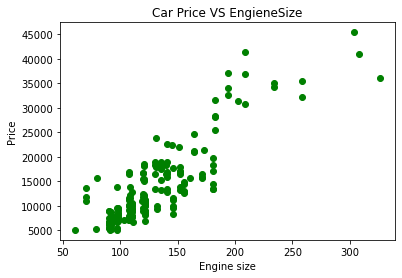

In [8]:
plt.scatter(cdf["enginesize"], cdf["price"],  color='g')
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.title('Car Price VS EngieneSize')
plt.show()

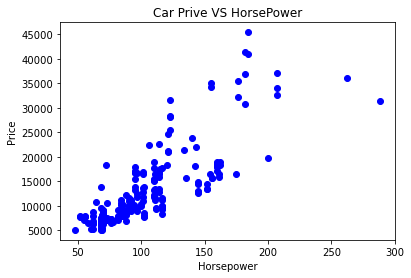

In [9]:
plt.scatter(cdf["horsepower"], cdf["price"],  color='b')
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title('Car Prive VS HorsePower')
plt.show() 

## Creating train and test data

In [10]:
#msk = np.random.rand(len(df)) < 0.8
x = cdf[['enginesize','horsepower']]
y = cdf[['price']]

## Building Linear Model

In [11]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
regr = linear_model.LinearRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
print(X_train.shape, X_test.shape)

regr.fit(X_train, y_train)
#x = np.asanyarray(train[['enginesize','horsepower']])
#y = np.asanyarray(train[['price']])
#regr.fit (x,y)

# The coefficients
#print ('Coefficients: ', regr.coef_)
#print ('Intercept: ',regr.intercept_)

(143, 2) (62, 2)


LinearRegression()

In [12]:
Y_pred = regr.predict(X_test)
#print(Y_pred)
#print(Y_train)

In [13]:
accuracy = regr.score(X_test,y_test)
print(accuracy*100)

78.05592900190085


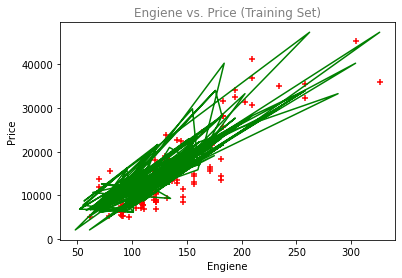

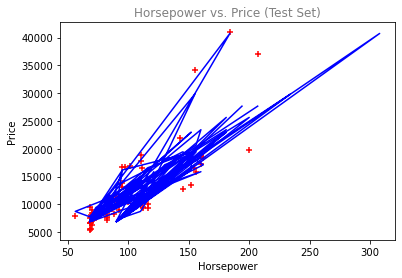

In [26]:
plt.scatter(X_train['enginesize'],y_train,color='red',marker='+')
plt.xlabel('Engiene')
plt.ylabel('Price')
plt.title('Engiene vs. Price (Training Set)', color = 'grey')
plt.plot(X_train, regr.predict(X_train), color='green')
plt.show()

plt.scatter(X_test['horsepower'],y_test,color='red',marker='+')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower vs. Price (Test Set)', color = 'grey')
plt.plot(X_test, regr.predict(X_test), color='blue')
plt.show()